In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.ndimage.filters import gaussian_filter
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/ML/Labels.csv')
df.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [ ]:
df.shape

(4750, 1)

In [ ]:
df.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [ ]:
images = np.load('/content/gdrive/My Drive/ML/images.npy')

In [ ]:
images.shape

(4750, 128, 128, 3)

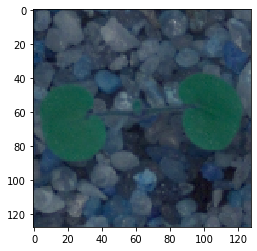

(128, 128, 3)


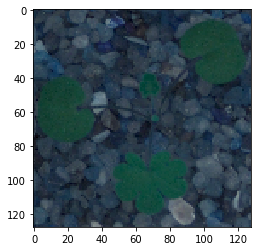

(128, 128, 3)


In [ ]:
for i in range(0,2):
  plt.imshow(images[i], interpolation='nearest')
  plt.show()
  print(images[i].shape)

In [ ]:
def convolute(edge_filter, img_resized, width, height):
  img_aug = img_resized.copy()
  for i in range(0,width-2):
    for j in range(0,height-2):
      conv_sum = 0
      conv_sum += img_resized[i,j,2] * edge_filter[0,0]
      conv_sum += img_resized[i+1,j,2] * edge_filter[1,0]
      conv_sum += img_resized[i+2,j,2] * edge_filter[2,0]
      conv_sum += img_resized[i,j+1,2] * edge_filter[0,1]
      conv_sum += img_resized[i+1,j+1,2] * edge_filter[1,1]
      conv_sum += img_resized[i+2,j+1,2] * edge_filter[2,1]
      conv_sum += img_resized[i,j+2,2] * edge_filter[0,2]
      conv_sum += img_resized[i+1,j+2,2] * edge_filter[1,2]
      conv_sum += img_resized[i+2,j+2,2] * edge_filter[2,2]
      if conv_sum < 0:
        conv_sum = 0
      elif conv_sum > 255:
        conv_sum = 255
      img_aug[i,j] = conv_sum
  return img_aug

In [ ]:
edge_filter =  np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]) #Sobel Filter
edge_filter.shape

(3, 3)

In [ ]:
blurred = gaussian_filter(images,sigma=1)

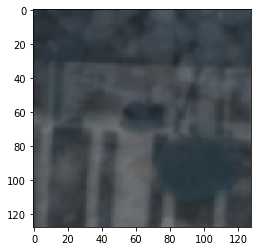

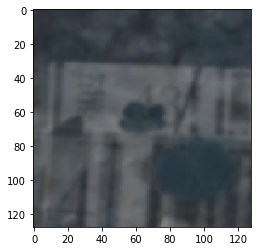

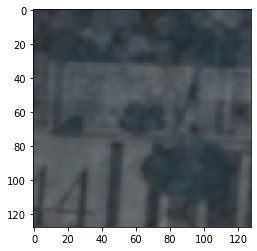

In [ ]:
for i in range(10,13):
  plt.imshow(blurred[i], interpolation='nearest')
  plt.show()

In [ ]:
lb_make = LabelEncoder()
df["Label"] = lb_make.fit_transform(df["Label"])
Y = df.iloc[:,:].values
Y[0]

array([10])

In [ ]:
trainx, testx, trainy, testy = train_test_split(blurred, Y, test_size=0.3, random_state=42)

In [ ]:
trainx = trainx.reshape(trainx.shape[0], 128, 128, 3)
testx = testx.reshape(testx.shape[0], 128, 128, 3) 
#Cant find the correct shape

In [ ]:
trainx = trainx.astype('float32')
testx = testx.astype('float32')

trainx /= 255
testx /= 255

In [ ]:
testx.shape

(1425, 128, 128, 3)

In [ ]:
trainy.shape

(3325, 1)

In [ ]:
testx.shape

(1425, 128, 128, 3)

In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)),
  Conv2D(filters=32, kernel_size=3, activation="relu"),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(12, activation='softmax'),
])

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model

In [ ]:
trainy = to_categorical(trainy, num_classes=12)
testy = to_categorical(testy, num_classes=12)

In [ ]:
model.fit(x=trainx, y=trainy, batch_size=32, epochs=30, validation_data=(testx, testy))

Epoch 1/30
104/104 [==============================] - 3s 28ms/step - loss: 2.2701 - accuracy: 0.2334 - val_loss: 1.8091 - val_accuracy: 0.3867
Epoch 2/30
104/104 [==============================] - 3s 27ms/step - loss: 1.6722 - accuracy: 0.4168 - val_loss: 1.4749 - val_accuracy: 0.4982
Epoch 3/30
104/104 [==============================] - 3s 27ms/step - loss: 1.3306 - accuracy: 0.5356 - val_loss: 1.2208 - val_accuracy: 0.5881
Epoch 4/30
104/104 [==============================] - 3s 27ms/step - loss: 1.1034 - accuracy: 0.6334 - val_loss: 1.1016 - val_accuracy: 0.6239
Epoch 5/30
104/104 [==============================] - 3s 27ms/step - loss: 0.8559 - accuracy: 0.7179 - val_loss: 0.9600 - val_accuracy: 0.6505
Epoch 6/30
104/104 [==============================] - 3s 27ms/step - loss: 0.6362 - accuracy: 0.8003 - val_loss: 0.6742 - val_accuracy: 0.7726
Epoch 7/30
104/104 [==============================] - 3s 27ms/step - loss: 0.4736 - accuracy: 0.8538 - val_loss: 0.6117 - val_accuracy: 0.7979

In [ ]:
model.evaluate(x=testx,y=testy)
y_pred = model.predict(testx)

45/45 [==============================] - 0s 9ms/step - loss: 0.2536 - accuracy: 0.9305


Predicted label: 10
Original label: 10
1.0
Predicted label: 1
Original label: 1
1.0
Predicted label: 8
Original label: 8
1.0
Predicted label: 5
Original label: 5
0.9999998
Predicted label: 6
Original label: 1
0.99999994


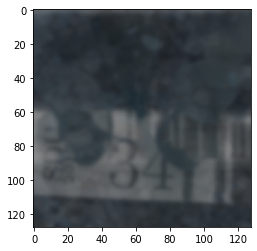

In [ ]:
test_eval = [2,3,33,36,59]

for i in test_eval:
  plt.imshow(testx[i].reshape(128, 128,3), cmap='gray')
  y_pred = model.predict(testx[i].reshape(1, 128, 128, 3))
  print("Predicted label:", y_pred.argmax())
  print("Original label:", np.argmax(testy[i]))
  print(y_pred.sum())